## Analisis Preselección Variables Encavi 2015-2016

In [7]:
import pandas as pd

# Cargar de dataset preprocesado
file_path = "ds_encavi.csv"
df = pd.read_csv(file_path, encoding="latin1")

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

# Información general del dataset
print("\nInformación general del dataset:")
print(df.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())

# Verificar valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())


Primeras filas del dataset:
   M  Edad  Horastrab  Domtrab  Calidadsue  Horassue  Famhipertension  \
0  0    38         48        1           2         7                0   
1  1    48         40        1           2         6                0   
2  0    38         36        0           2         6                0   
3  1    59         70        0           2         6                1   
4  1    60          0        0           2         7                0   

   Famdiabetes  Famcardiaca  Famvascular  ...  conspescadosem  conslacteossem  \
0            0            0            0  ...               1               2   
1            0            0            0  ...               1               6   
2            0            0            0  ...               2               0   
3            0            0            0  ...               1              12   
4            0            0            0  ...               1               5   

   consbebidsasazucaradas  conspan  consaguase

### Distribución Variables Dependientes

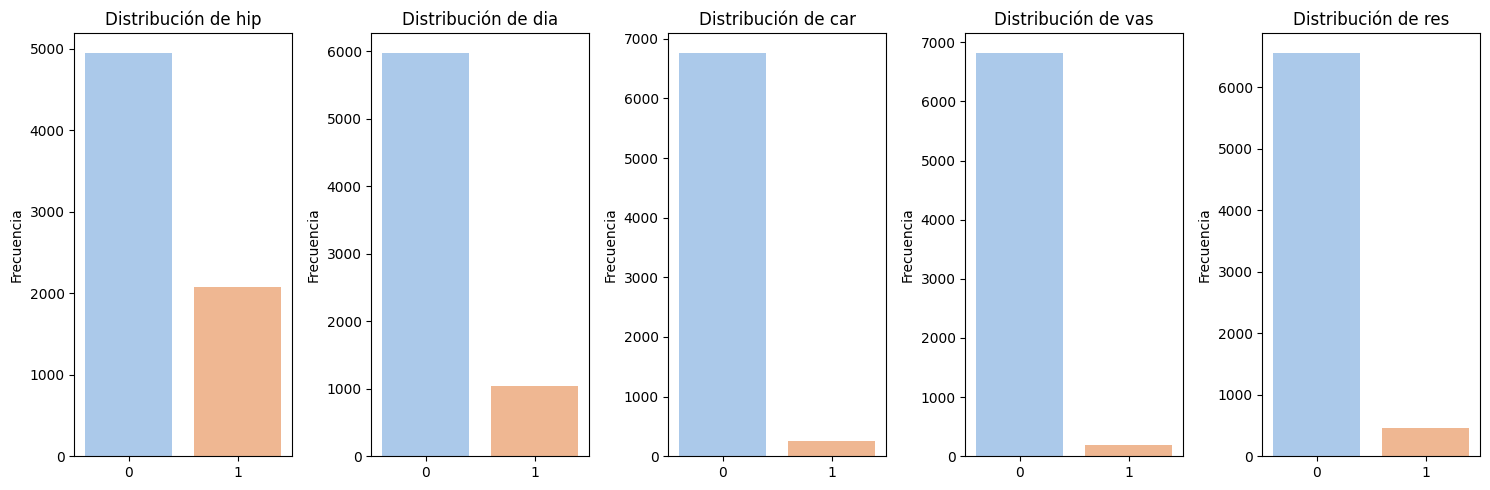

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables dependientes binarias
variables_binarias = ["hip", "dia", "car", "vas", "res"]

# Graficar la distribución de cada variable dependiente
fig, axes = plt.subplots(1, len(variables_binarias), figsize=(15, 5))
for i, var in enumerate(variables_binarias):
    sns.countplot(x=df[var], hue=df[var], ax=axes[i], palette="pastel", legend=False)
    axes[i].set_title(f"Distribución de {var}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()



### Paso 2: Sobre Tratamiento de Valores Faltantes

***Realizado previamente***


### Paso 3: Análisis de Correlación y Matriz de Correlaciones (Excluyendo Variables Dependientes)
**Fundamentos**
Antes de analizar la correlación entre variables, eliminamos las variables dependientes, ya que estas serán nuestras variables objetivo en los modelos de Machine Learning. Además, incluimos la variable "Cluster", ya que también se usará como una variable dependiente en el análisis posterior.

Las variables dependientes identificadas son:

hip (Hipertensión)
dia (Diabetes)
car (Enfermedad cardíaca)
vas (Accidente vascular)
res (Enfermedad respiratoria crónica)
Cluster (Variable de agrupamiento)

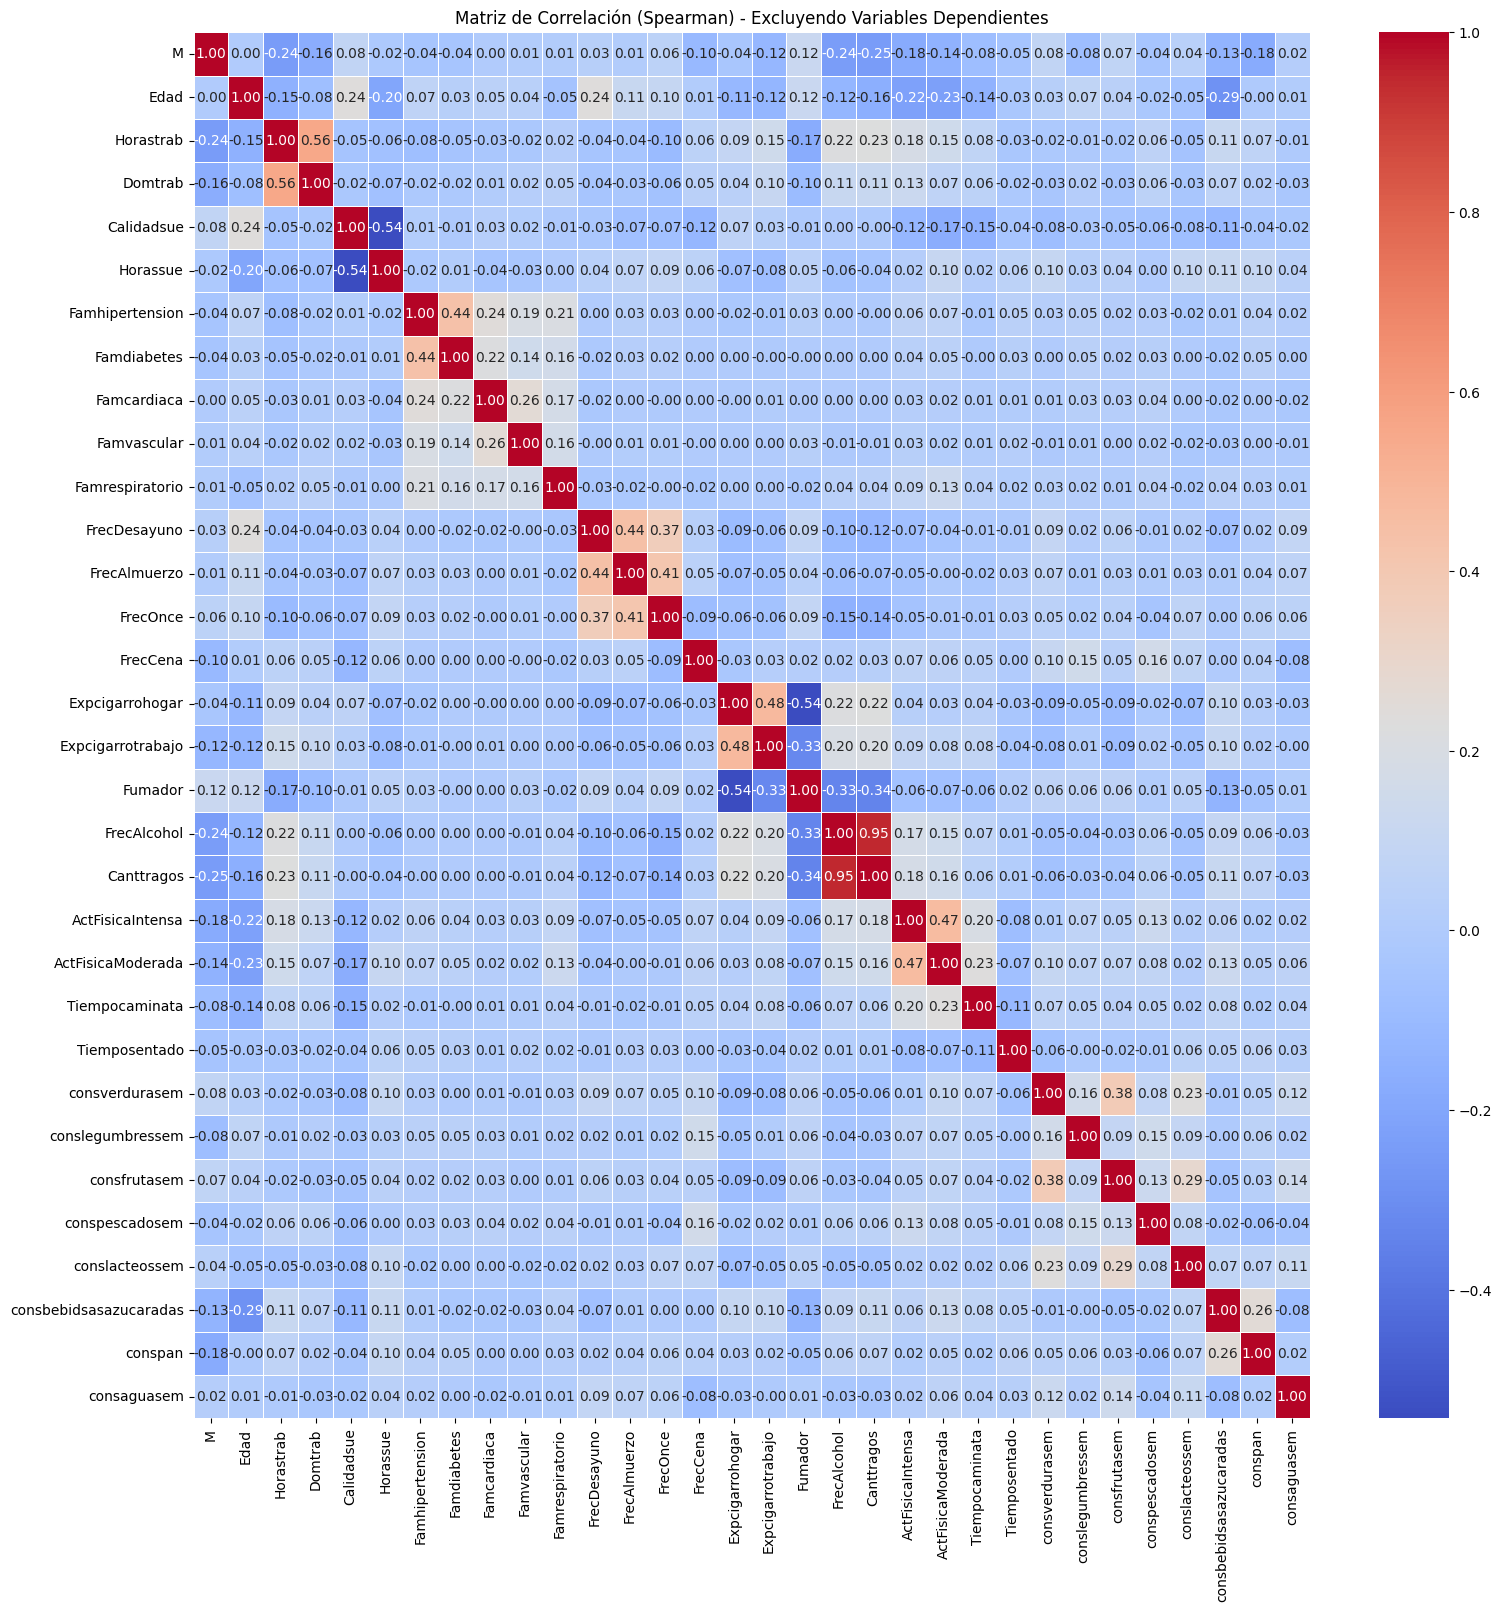

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir las variables dependientes (objetivo) a eliminar del análisis de correlación
variables_dependientes = ["hip", "dia", "car", "vas", "res", "Cluster"]

# Eliminar las variables dependientes del dataset
df_independientes = df.drop(columns=variables_dependientes, errors="ignore")

# Calcular la matriz de correlación usando Spearman
mat_corr = df_independientes.corr(method="spearman")

# Graficar la matriz de correlación
plt.figure(figsize=(18, 18))
sns.heatmap(mat_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación (Spearman) - Excluyendo Variables Dependientes")
plt.show()



### Paso 4 Corregido: Test de Bartlett y KMO
***Fundamentos***

El Test de Bartlett evalúa si la matriz de correlaciones es significativamente diferente de una matriz identidad.
El Test de KMO mide la adecuación de la muestra para el Análisis Factorial.

In [13]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

# Aplicar el test de Bartlett sobre las variables independientes
chi_square_value, p_value = calculate_bartlett_sphericity(df_independientes)

print(f"Chi-cuadrado: {chi_square_value}")
print(f"Valor p: {p_value}")

# Aplicar el test de KMO sobre las variables independientes
kmo_all, kmo_model = calculate_kmo(df_independientes)

print(f"Índice KMO general: {kmo_model}")

# Interpretación
if kmo_model >= 0.8:
    print("La adecuación muestral es excelente para Análisis Factorial.")
elif kmo_model >= 0.7:
    print("La adecuación muestral es buena para Análisis Factorial.")
elif kmo_model >= 0.6:
    print("La adecuación muestral es aceptable.")
else:
    print("La adecuación muestral es baja, el Análisis Factorial podría no ser adecuado.")



Chi-cuadrado: 32360.26448407514
Valor p: 0.0
Índice KMO general: 0.6635194480584695
La adecuación muestral es aceptable.


Los resultados del Paso 4 sugieren que el Análisis Factorial y el PCA son posibles, pero debemos ser cautelosos debido a la adecuación muestral aceptable (KMO = 0.66). Esto implica que el uso del PCA puede ser válido, pero quizás no tan efectivo como lo sería en un dataset con un KMO superior a 0.8.

### Paso 5: Análisis de Componentes Principales (PCA) y Análisis Factorial (FA)
**Fundamentos**

PCA (Análisis de Componentes Principales) ayuda a reducir la dimensionalidad maximizando la varianza retenida.
FA (Análisis Factorial) asume que las variables tienen una estructura latente y busca factores subyacentes.

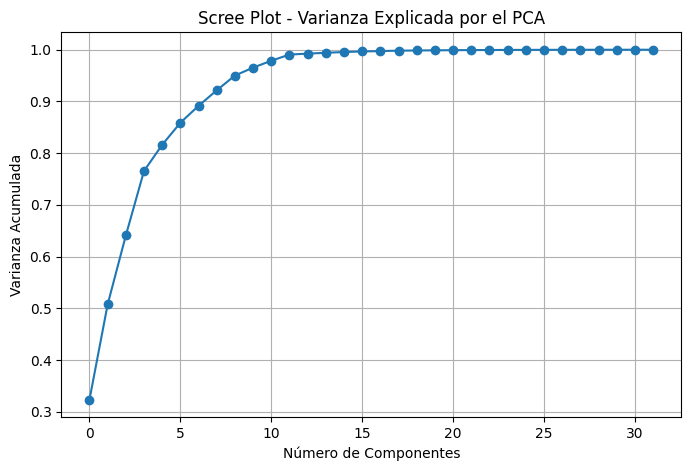

Número óptimo de componentes para retener el 95% de la varianza: 9
Varianza explicada por los factores seleccionados en FA: 42.47873704863628
Cargas factoriales del Análisis Factorial:
                               0         1         2         3         4  \
M                      -0.293847 -0.039843 -0.098104 -0.041077 -0.022504   
Edad                   -0.066948 -0.131475 -0.361215  0.040663  0.247464   
Horastrab               0.140257  0.094078  0.042112 -0.058073 -0.046140   
Domtrab                 0.029504  0.055260 -0.002633  0.017028 -0.044052   
Calidadsue             -0.006416  0.053692 -0.676329  0.035980 -0.084801   
Horassue               -0.020945 -0.077133  0.798550 -0.040245  0.089130   
Famhipertension         0.029750 -0.024577 -0.002228  0.651087  0.035175   
Famdiabetes             0.031900  0.002766  0.020131  0.557480  0.020827   
Famcardiaca            -0.010145  0.005540 -0.037809  0.434570 -0.010353   
Famvascular            -0.018801 -0.006276 -0.031918  0

In [15]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer

# 1. Aplicar PCA
pca = PCA()
pca.fit(df_independientes)

# 2. Graficar el Scree Plot para determinar el número de componentes óptimos
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Acumulada")
plt.title("Scree Plot - Varianza Explicada por el PCA")
plt.grid()
plt.show()

# 3. Selección del número óptimo de componentes (Ejemplo: 95% de varianza explicada)
n_components_optimos = np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.95) + 1
print(f"Número óptimo de componentes para retener el 95% de la varianza: {n_components_optimos}")

# 4. Aplicar PCA con el número óptimo de componentes
pca_final = PCA(n_components=n_components_optimos)
df_pca = pca_final.fit_transform(df_independientes)

# 5. Comparar con Análisis Factorial (FA)
fa = FactorAnalyzer(n_factors=n_components_optimos, rotation="varimax")
fa.fit(df_independientes)

# 6. Verificar la varianza explicada por FA
varianza_explicada_fa = np.sum(fa.get_eigenvalues()[:n_components_optimos])
print(f"Varianza explicada por los factores seleccionados en FA: {varianza_explicada_fa}")

# 7. Mostrar las cargas factoriales (FA)
print("Cargas factoriales del Análisis Factorial:")
print(pd.DataFrame(fa.loadings_, index=df_independientes.columns))


## Paso 6 Construcción de Modelos con Random Forest
**Fundamentos**

+ SMOTE (Synthetic Minority Over-sampling Technique) genera ejemplos sintéticos de la clase minoritaria en el conjunto de entrenamiento.
+ No aplicamos SMOTE en el conjunto de prueba, porque eso generaría un sesgo en la evaluación.
+ SMOTE es útil para evitar que Random Forest aprenda un sesgo hacia la clase mayoritaria.
+ Random Forest es un modelo basado en árboles de decisión que maneja bien datos de alta dimensionalidad.
+ Cross-validation es clave para evitar overfitting.
+ Evaluaremos el modelo con dos versiones de datos (PCA y FA) y compararemos su rendimiento.

In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np

# Variables objetivo (Ejemplo: Hipertensión "hip")
target_variable = "hip"

# Opción 1: Usar los datos transformados por PCA
X_pca = df_pca  
y = df[target_variable]  # Variable dependiente original

# Opción 2: Usar los datos transformados por FA
X_fa = fa.transform(df_independientes)  # Factores latentes

# División en conjunto de entrenamiento y prueba (80/20) **ANTES de aplicar SMOTE**
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)
X_train_fa, X_test_fa, _, _ = train_test_split(X_fa, y, test_size=0.2, random_state=42, stratify=y)

# Aplicar SMOTE SOLO en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_pca_smote, y_train_smote = smote.fit_resample(X_train_pca, y_train)
X_train_fa_smote, y_train_smote_fa = smote.fit_resample(X_train_fa, y_train)

# Inicializar modelos de Random Forest
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_fa = RandomForestClassifier(n_estimators=100, random_state=42)

# Validación cruzada estratificada (5 folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluar Random Forest con PCA + SMOTE
scores_pca = cross_val_score(rf_pca, X_train_pca_smote, y_train_smote, cv=cv, scoring="roc_auc")
print(f"\nROC-AUC medio con PCA + SMOTE: {np.mean(scores_pca):.4f}")

# Evaluar Random Forest con FA + SMOTE
scores_fa = cross_val_score(rf_fa, X_train_fa_smote, y_train_smote_fa, cv=cv, scoring="roc_auc")
print(f"\nROC-AUC medio con FA + SMOTE: {np.mean(scores_fa):.4f}")

# Selección del mejor modelo basado en AUC
if np.mean(scores_pca) > np.mean(scores_fa):
    print("\nPCA tuvo mejor rendimiento, entrenando modelo final con PCA.")
    best_model = rf_pca.fit(X_train_pca_smote, y_train_smote)
    X_test_final = X_test_pca
else:
    print("\nFA tuvo mejor rendimiento, entrenando modelo final con FA.")
    best_model = rf_fa.fit(X_train_fa_smote, y_train_smote_fa)
    X_test_final = X_test_fa

# Predicción en el conjunto de prueba
y_pred = best_model.predict(X_test_final)
y_prob = best_model.predict_proba(X_test_final)[:, 1]


# Evaluación final
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Final: {roc_auc_score(y_test, y_prob):.4f}")




ROC-AUC medio con PCA + SMOTE: 0.9068

ROC-AUC medio con FA + SMOTE: 0.8979

PCA tuvo mejor rendimiento, entrenando modelo final con PCA.

Matriz de Confusión:
[[790 200]
 [124 290]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       990
           1       0.59      0.70      0.64       414

    accuracy                           0.77      1404
   macro avg       0.73      0.75      0.74      1404
weighted avg       0.78      0.77      0.77      1404

ROC-AUC Final: 0.8333


### Paso 7: Optimización de Hiperparámetros con GridSearchCV
***Fundamentos***

Ahora que seleccionamos PCA como la mejor representación de los datos, podemos mejorar el rendimiento del Random Forest ajustando sus hiperparámetros.

Random Forest tiene varios hiperparámetros clave que afectan su rendimiento:

+ n_estimators: Número de árboles en el bosque.
+ max_depth: Profundidad máxima de los árboles. Un valor mayor puede llevar a sobreajuste.
+ min_samples_split: Número mínimo de muestras requeridas para dividir un nodo.
+ min_samples_leaf: Número mínimo de muestras en una hoja de decisión.
+ max_features: Cantidad de características a considerar en cada división.
Usaremos

GridSearchCV para probar múltiples combinaciones y encontrar la mejor configuración.

In [43]:
from sklearn.model_selection import GridSearchCV

# Definir la malla de hiperparámetros a probar en Random Forest
param_grid = {
    "n_estimators": [100, 200, 300],  # Número de árboles en el bosque
    "max_depth": [None, 10, 20, 30],  # Profundidad máxima de los árboles
    "min_samples_split": [2, 5, 10],  # Mínimo de muestras para dividir un nodo
    "min_samples_leaf": [1, 2, 4],  # Mínimo de muestras en hojas terminales
    "max_features": ["sqrt", "log2"],  # Método para seleccionar características en cada división
}

# Configurar GridSearchCV con validación cruzada
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,  # Validación cruzada de 5 folds
    scoring="roc_auc",  # Optimización basada en la métrica AUC-ROC
    n_jobs=-1,  # Paralelización para mayor eficiencia
    verbose=2  # Muestra información sobre el progreso
)

# Aplicar GridSearchCV en el conjunto de entrenamiento optimizado con SMOTE
grid_search.fit(X_train_pca_smote, y_train_smote)

# Obtener la mejor combinación de hiperparámetros
print(f"\nMejores hiperparámetros encontrados: {grid_search.best_params_}")

# Entrenar el modelo final con los mejores hiperparámetros
best_model = grid_search.best_estimator_
best_model.fit(X_train_pca_smote, y_train_smote)

# Evaluación en el conjunto de prueba
y_pred_best = best_model.predict(X_test_pca)
y_prob_best = best_model.predict_proba(X_test_pca)[:, 1]

# Mostrar métricas de desempeño
print("\nMatriz de Confusión (Modelo Optimizado):")
print(confusion_matrix(y_test, y_pred_best))

print("\nReporte de Clasificación (Modelo Optimizado):")
print(classification_report(y_test, y_pred_best))

print(f"ROC-AUC Final con Modelo Optimizado: {roc_auc_score(y_test, y_prob_best):.4f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Mejores hiperparámetros encontrados: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Matriz de Confusión (Modelo Optimizado):
[[789 201]
 [118 296]]

Reporte de Clasificación (Modelo Optimizado):
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       990
           1       0.60      0.71      0.65       414

    accuracy                           0.77      1404
   macro avg       0.73      0.76      0.74      1404
weighted avg       0.79      0.77      0.78      1404

ROC-AUC Final con Modelo Optimizado: 0.8353


### Análisis de Resultados del Paso 7

Tras la optimización de hiperparámetros, el modelo ha mejorado levemente su capacidad predictiva. Veamos las comparaciones:

Métrica	Antes de la OptimizaciónD | Después de la Optimización

**ROC-AUC Final**	0.8333	0.8353 (+0.002)

**Recall (Clase 1)**	0.70	0.71 (+0.01)

**Precision (Clase 1)**	0.59	0.60 (+0.01)

**Accuracy**	0.77	0.77 (Igual)

¿Qué significan estos resultados?

*** El modelo optimizado mantiene una alta capacidad predictiva, con una ligera mejora en Recall y ROC-AUC.

*** El modelo mantiene una buena precisión en la clase 1 (casos positivos), aunque todavía hay margen de mejora.

*** No hubo un gran cambio en la accuracy, lo que sugiere que el modelo ya estaba cerca de su rendimiento máximo.


### Paso 8: Interpretación del Modelo

***Fundamentos***

Ahora que tenemos un modelo optimizado, queremos entender:

+ ¿Cuáles son las variables más importantes en la predicción?
+ ¿Cómo influye cada variable en la probabilidad de que una persona tenga hipertensión?
+ ¿Existen patrones interesantes que podamos detectar?

Para esto, utilizaremos:

+ Importancia de características en Random Forest (para ver qué variables tienen mayor impacto).
+ SHAP (SHapley Additive Explanations) para entender cómo cada variable afecta la predicción.
  


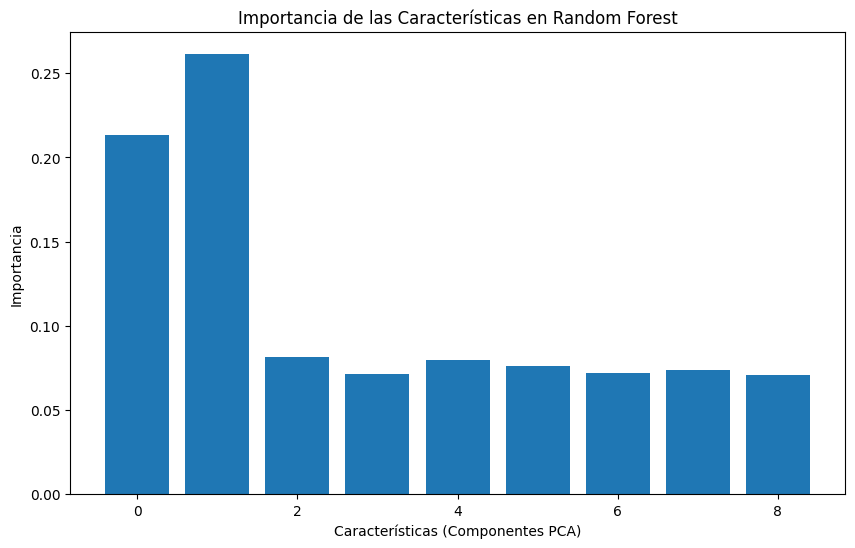

In [58]:
import matplotlib.pyplot as plt
import shap

# Importancia de Características según Random Forest
importances = best_model.feature_importances_

# Visualizar Importancia de Características
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances)
plt.xlabel("Características (Componentes PCA)")
plt.ylabel("Importancia")
plt.title("Importancia de las Características en Random Forest")
plt.show()



In [64]:
import numpy as np

# Revisar la estructura de shap_values
print(f"Tipo de shap_values: {type(shap_values)}")
if isinstance(shap_values, list):
    for i, sv in enumerate(shap_values):
        print(f"shap_values[{i}].shape: {sv.shape}")
else:
    print(f"shap_values.shape: {shap_values.shape}")

# Revisar dimensiones de X_test_pca
print(f"Dimensión de X_test_pca: {X_test_pca.shape}")

# Revisar dimensiones del modelo (cuántas características espera)
print(f"Cantidad de características usadas en Random Forest: {best_model.n_features_in_}")




Tipo de shap_values: <class 'numpy.ndarray'>
shap_values.shape: (1404, 9, 2)
Dimensión de X_test_pca: (1404, 9)
Cantidad de características usadas en Random Forest: 9


Nuevo tamaño de shap_values: (1404, 9)


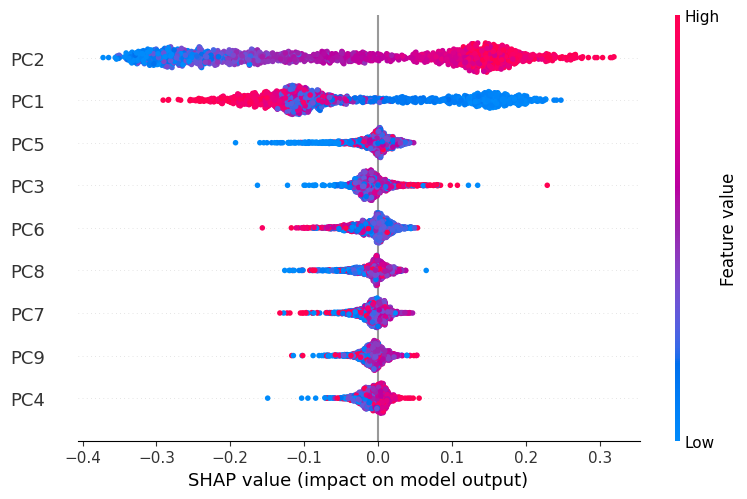

In [66]:
import shap

# Extraemos los valores SHAP de la clase positiva (columna 1 de la tercera dimensión)
shap_values_fixed = shap_values[:, :, 1]

# Verificar que la nueva dimensión coincide con X_test_pca
print(f"Nuevo tamaño de shap_values: {shap_values_fixed.shape}")  # Debe ser (1404, 9)

# Visualización corregida de los valores SHAP
shap.summary_plot(shap_values_fixed, X_test_pca, feature_names=[f"PC{i+1}" for i in range(X_test_pca.shape[1])])


### ¿Qué obtenemos con este análisis?

✅ Identificamos qué componentes del PCA tienen mayor impacto en la predicción de hipertensión.

✅ SHAP nos ayuda a visualizar cómo cada variable afecta las predicciones del modelo.

✅ Podemos entender patrones clave en los datos para futuras recomendaciones y mejoras.

### Observaciones Clave

Los dos primeros componentes principales (PC1 y PC2) tienen la mayor importancia:

PC1 (~ 21%) y PC2 (~ 26%) son las características más influyentes en la predicción.
Esto sugiere que gran parte de la variabilidad en los datos relevantes para hipertensión está capturada por estas dos dimensiones principales.
Las siguientes características tienen una importancia mucho menor:

A partir de PC3, la importancia baja notablemente y se distribuye más equitativamente.
Los últimos componentes tienen menos impacto en la predicción, lo que sugiere que podrían ser prescindibles.
Podría considerarse una reducción adicional de dimensionalidad:

Dado que PC1 y PC2 son dominantes, podríamos explorar modelos con solo las primeras 3-4 dimensiones para evaluar si mantenemos el rendimiento y reducimos la complejidad del modelo.

In [ ]:
import shap

# Crear el explicador de SHAP basado en el modelo Random Forest optimizado
explainer = shap.TreeExplainer(best_model)

# Calcular los valores SHAP para el conjunto de prueba
shap_values = explainer.shap_values(X_test_pca)

# Visualizar la importancia de cada componente PCA en la predicción
shap.summary_plot(shap_values[1], X_test_pca, feature_names=[f"PC{i+1}" for i in range(X_test_pca.shape[1])])


### Identificar las Variables Originales que Conforman PC1 y PC2
***Fundamentos**

El PCA transforma las variables originales en nuevos componentes principales (PCs), pero estos siguen siendo combinaciones lineales de las variables originales.
Para interpretar PC1 y PC2, debemos analizar sus cargas en la matriz de PCA, lo que nos dirá qué variables originales contribuyen más a cada componente.

In [70]:
import pandas as pd

# Obtener la matriz de cargas del PCA aplicado en el paso 5
pca_components = pd.DataFrame(pca_final.components_, columns=df_independientes.columns)

# Extraer las cargas de PC1 y PC2
pc1_loadings = pca_components.iloc[0].sort_values(ascending=False)  # Cargas de PC1
pc2_loadings = pca_components.iloc[1].sort_values(ascending=False)  # Cargas de PC2

# Mostrar las 5 variables más influyentes en PC1 y PC2
print("\n🔹 Variables más influyentes en PC1:")
print(pc1_loadings.head(5))

print("\n🔹 Variables más influyentes en PC2:")
print(pc2_loadings.head(5))



🔹 Variables más influyentes en PC1:
Horastrab                 0.954778
consbebidsasazucaradas    0.065369
ActFisicaModerada         0.055984
ActFisicaIntensa          0.052191
Tiempocaminata            0.047206
Name: 0, dtype: float64

🔹 Variables más influyentes en PC2:
Edad            0.949357
Horastrab       0.279766
consfrutasem    0.017239
consaguasem     0.013726
Calidadsue      0.009870
Name: 1, dtype: float64


### Interpretación de los Componentes Principales
***PC1 – Relacionado con el Trabajo y Actividad Física***


Horas de trabajo (0.95) tiene una carga dominante, lo que indica que este componente está fuertemente ligado al tiempo dedicado al trabajo.
Consumo de bebidas azucaradas, actividad física moderada e intensa, y tiempo de caminata tienen un peso menor pero relevante.
Posible interpretación: PC1 podría representar un estilo de vida activo vs. sedentario, ya que combina factores de trabajo y actividad física.

***PC2 – Relacionado con la Edad y el Estilo de Vida***

Edad (0.94) es el principal factor, lo que indica que este componente está casi completamente determinado por la edad.
Horas de trabajo (0.28) también influye, aunque en menor medida.
El consumo de frutas, agua y calidad del sueño tienen un impacto menor.
Posible interpretación: PC2 podría representar factores relacionados con el envejecimiento y hábitos de vida.

### Evaluar la Reducción de Componentes

Dado que PC7, PC8, PC9 y PC4 tienen poco impacto en el modelo (según SHAP), podemos probar un PCA con menos dimensiones 
y ver si el rendimiento del modelo se mantiene estable.
    

***Estrategia***
+ Reducir el número de componentes PCA eliminando los de menor impacto.
+ Volver a entrenar Random Forest con esta nueva versión de PCA.
+ Comparar si el rendimiento sigue siendo bueno con menos variables.

In [80]:
from sklearn.decomposition import PCA

# Redefinir PCA con menos componentes (basado en SHAP)
n_components_optimizados = 5  # Elegimos 5 en lugar de 9, eliminando los de menor impacto

# Aplicamos PCA con menos dimensiones
pca_reducido = PCA(n_components=n_components_optimizados)
X_train_pca_reducido = pca_reducido.fit_transform(X_train_pca_smote)
X_test_pca_reducido = pca_reducido.transform(X_test_pca)

# Volver a entrenar el modelo Random Forest con los nuevos componentes PCA reducidos
rf_reducido = RandomForestClassifier(n_estimators=300, max_depth=None, max_features='sqrt', 
                                     min_samples_leaf=1, min_samples_split=2, random_state=42)
rf_reducido.fit(X_train_pca_reducido, y_train_smote)

# Evaluación del modelo reducido
y_pred_reducido = rf_reducido.predict(X_test_pca_reducido)
y_prob_reducido = rf_reducido.predict_proba(X_test_pca_reducido)[:, 1]

# Comparar métricas con el modelo anterior
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("\n🔹 Matriz de Confusión (Modelo con PCA Reducido):")
print(confusion_matrix(y_test, y_pred_reducido))

print("\n🔹 Reporte de Clasificación (Modelo con PCA Reducido):")
print(classification_report(y_test, y_pred_reducido))

print(f"🔹 ROC-AUC Final con PCA Reducido: {roc_auc_score(y_test, y_prob_reducido):.4f}")



🔹 Matriz de Confusión (Modelo con PCA Reducido):
[[783 207]
 [112 302]]

🔹 Reporte de Clasificación (Modelo con PCA Reducido):
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       990
           1       0.59      0.73      0.65       414

    accuracy                           0.77      1404
   macro avg       0.73      0.76      0.74      1404
weighted avg       0.79      0.77      0.78      1404

🔹 ROC-AUC Final con PCA Reducido: 0.8318
